#### 10.04.25, &copy; Maksym Smolyar KI-21-1

# Лабораторна робота #2. Побудова лінійного бінарного класифікатора на основі оптимізації функціонала якості

**Мета**: реалізузвати бінарний класифікатор на основі оптимізації функціонала якості засобами мови Python

## Що ви будете вміти?
* Використовувати деякі можливості бібліотеки `NumPy`
* Реалізувати простий лінійний класифікатор на основі оптимізації функціонала якості засобами мови Python

## Завдання для самостійної роботи 

1. Імпортувати дані для навчальної вибірки згідно з індивідуальним варіантом (імпорт організувати з файлу).

In [14]:
import json

# Створюємо дані для навчальної вибірки (варіант 11)
data = {
    "x_train_11": [
        [35, 49],
        [48, 41],
        [37, 11],
        [12, 25],
        [11, 46],
        [40, 6],
        [21, 13],
        [12, 21],
        [26, 10],
        [20, 41]
    ],
    "y_train_11": [1, 1, 1, -1, -1, -1, 1, 1, 1, -1]
}

# Записуємо дані у файл data_variant11.json
with open("data_variant11.json", "w", encoding="utf-8") as file:
    json.dump(data, file, ensure_ascii=False, indent=4)

# Імпортуємо дані з файлу
with open("data_variant11.json", "r", encoding="utf-8") as file:
    imported_data = json.load(file)

x_train_11 = imported_data["x_train_11"]
y_train_11 = imported_data["y_train_11"]

print("x_train_11:", x_train_11)
print("y_train_11:", y_train_11)



x_train_11: [[35, 49], [48, 41], [37, 11], [12, 25], [11, 46], [40, 6], [21, 13], [12, 21], [26, 10], [20, 41]]
y_train_11: [1, 1, 1, -1, -1, -1, 1, 1, 1, -1]


2. Побудувати бінарний МНК-класифікатор згідно з розглянутим вище прикладом і вивести результати бінарної класифікації на графіку.

Знайдені ваги (w0, w1, w2): [-0.27950256  0.02711382 -0.00877869]
Прогнозовані мітки: [ 1.  1.  1. -1. -1.  1.  1. -1.  1. -1.]


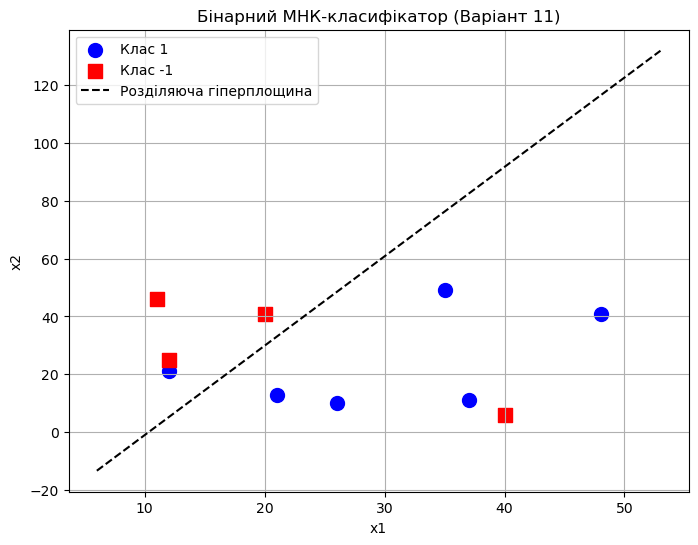

In [16]:
import numpy as np
import matplotlib.pyplot as plt

# Навчальні дані (варіант 11)
x_train = np.array([
    [35, 49],
    [48, 41],
    [37, 11],
    [12, 25],
    [11, 46],
    [40, 6],
    [21, 13],
    [12, 21],
    [26, 10],
    [20, 41]
])
y_train = np.array([1, 1, 1, -1, -1, -1, 1, 1, 1, -1])

# Додатковий стовпець одиниць для зсуву (w0)
X_ext = np.hstack([np.ones((x_train.shape[0], 1)), x_train])

# Розв’язання МНК (метод найменших квадратів)
w = np.linalg.lstsq(X_ext, y_train, rcond=None)[0]
print("Знайдені ваги (w0, w1, w2):", w)

# Прогнозування
predictions = np.sign(X_ext @ w)
print("Прогнозовані мітки:", predictions)

# Візуалізація
plt.figure(figsize=(8, 6))

for label, marker, color in zip([1, -1], ['o', 's'], ['blue', 'red']):
    plt.scatter(x_train[y_train == label][:, 0],
                x_train[y_train == label][:, 1],
                marker=marker,
                color=color,
                label=f'Клас {label}',
                s=100)

x_vals = np.linspace(x_train[:, 0].min() - 5, x_train[:, 0].max() + 5, 100)

if w[2] != 0:
    y_vals = -(w[0] + w[1] * x_vals) / w[2]
    plt.plot(x_vals, y_vals, 'k--', label='Розділяюча гіперплощина')
else:
    print("Не вдалося побудувати розділяючу лінію, оскільки w[2] = 0")

plt.xlabel("x1")
plt.ylabel("x2")
plt.title("Бінарний МНК-класифікатор (Варіант 11)")
plt.legend()
plt.grid(True)
plt.show()




3. Проаналізувати  отримані результати і порівняти їх з результатами, отриманими у лаб. роб. №1.

### Аналіз отриманих результатів

1. **Підхід з використанням бінарного класифікатора**

- **Алгоритм:**  
  Бінарний класифікатор — це ітеративний алгоритм, який оновлює ваги на основі помилок класифікації. Він безпосередньо оптимізує модель для мінімізації кількості неправильних класифікацій.

- **Розділяюча гіперплощина:**  
  Модель знаходить коефіцієнти (`model.coef_`) та вільний член (`model.intercept_`), за якими будується гіперплощина за рівнянням:
  $$
  w_1 \cdot x_1 + w_2 \cdot x_2 + b = 0,
  $$
  що записується у вигляді:
  $$
  x_2 = \frac{-w_1 \cdot x_1 - b}{w_2}.
  $$

- **Результати:**  
  - Модель знаходить розділяючу лінію, яка безпосередньо мінімізує класифікаційну помилку.
  - Підхід добре працює, якщо дані лінійно роздільні.

---

2. **Підхід з використанням МНК**

- **Алгоритм:**  
  Метод найменших квадратів знаходить аналітичне рішення, мінімізуючи суму квадратів різниць між прогнозованими та фактичними мітками. Використовується формула:
  $$
  w = (X^T X)^{-1} X^T y,
  $$
  де \(X\) — матриця ознак з доданим стовпцем одиниць для врахування зсуву.

- **Розділяюча гіперплощина:**  
  Рівняння гіперплощини записується як:
  $$
  w_0 + w_1 \cdot x_1 + w_2 \cdot x_2 = 0,
  $$
  що можна переписати у вигляді:
  $$
  x_2 = \frac{-w_0 - w_1 \cdot x_1}{w_2}.
  $$

- **Результати:**  
  - Отримане аналітичне рішення дозволяє швидко визначити ваги.
  - Оскільки МНК мінімізує квадратну помилку, а не класифікаційну, розділяюча лінія може бути менш оптимальною для завдання класифікації.
  - Метод може бути більш чутливим до викидів, адже великі відхилення сильно впливають на суму квадратів.

---

3. **Порівняння підходів**

- **Ціль оптимізації:**  
  - **Бінарний класифікатор:** оптимізує класифікаційну помилку, спрямовуючи модель на правильне розділення класів.
  - **МНК:** оптимізує суму квадратів помилок, що може не забезпечувати найкраще розділення класів, якщо дані містять аномальні значення.

- **Побудова розділяючої лінії:**  
  - Обидва підходи формують лінійну гіперплощину, але її положення та орієнтація залежать від метрики оптимізації.
  - Бінарний класифікатор безпосередньо орієнтується на розмежування класів, тоді як МНК шукає найкращу апроксимацію даних.

- **Чутливість до даних:**  
  - **МНК** є більш чутливим до викидів через використання квадратичної функції втрат.
  - **Бінарний класифікатор** зазвичай краще адаптується до локальних змін завдяки ітеративному оновленню ваг.

- **Процес навчання:**  
  - Бінарний класифікатор використовує ітеративний підхід, де кінцеве рішення може залежати від порядку подання даних.
  - МНК дає однозначне аналітичне рішення, яке обчислюється за допомогою формули, незалежно від порядку даних.

---

4. **Висновок**

- **Бінарний класифікатор** є кращим вибором, коли основна мета — мінімізувати кількість класифікаційних помилок, а дані добре лінійно роздільні.
- **МНК** забезпечує швидке отримання моделі завдяки аналітичному вирішенню, проте може бути менш ефективним для завдань класифікації через мінімізацію квадратної помилки.

Вибір підходу залежить від специфіки даних та завдання: якщо важливо досягти високої точності класифікації, варто обрати алгоритм, орієнтований безпосередньо на цю мету (як-от бінарний класифікатор), тоді як МНК може слугувати швидким методом апроксимації розділяючої лінії.


4. Дати відповіді на контрольні запитання.

5. Відправити результати роботи у файлі lab_2_StudentLastName.ipynb до віддаленого репозиторію на GіtHub.

## Контрольні питання

1. Що таке відступ (margin) і яка його роль в побудові моделі класифікації?

**Відступ (margin)** — це відстань між розділюючою гіперплощиною та найближчими точками з різних класів у навчальній вибірці. 

### Роль відступу в моделі класифікації

- **Покращення узагальнення:**  
  Максимізація відступу сприяє побудові моделі, яка краще узагальнює на нових даних. Великий відступ означає, що модель не лише розділяє дані, але й має запас, що дозволяє зменшити ймовірність помилок при класифікації нових прикладів.

- **Стійкість до шуму:**  
  Модель з більшим відступом менш чутлива до невеликих змін або шуму у даних, оскільки розділяюча гіперплощина далеко від найближчих точок.

- **Оптимізація в SVM:**  
  У методі опорних векторів (SVM) задача полягає в тому, щоб знайти таку гіперплощину, яка максимізує відступ. Це дозволяє досягти оптимального розділення класів і забезпечує хорошу здатність до узагальнення.

Таким чином, відступ є ключовим елементом, який допомагає зробити класифікатор більш надійним і стійким до змін у даних.


2. Яка роль функції втрат і чому не можна знайти коефіцієнти лінійного класифікатора шляхом безпосереднього розв'язаня задачі оптимізації через знаходження похідної? 

Функція втрат є центральним елементом у процесі навчання моделі, оскільки вона вимірює різницю між прогнозованими значеннями та фактичними мітками даних. Мінімізація функції втрат дозволяє моделі «навчитися» робити точні передбачення.

### Чому не можна знайти коефіцієнти шляхом прямого розв'язання похідних:

1. **Недиференційованість функції втрат:**  
   Деякі функції втрат (наприклад, hinge loss у SVM) можуть бути недиференційованими в певних точках, що ускладнює застосування класичного методу знаходження похідної та розв'язання рівняння, де похідна дорівнює нулю.

2. **Нелінійність та наявність локальних мінімумів:**  
   Навіть якщо функція втрат диференційована, вона часто є нелінійною та може мати декілька локальних мінімумів. Пряме рівняння похідних може призвести до знаходження локального, а не глобального мінімуму.

3. **Обчислювальна складність:**  
   При роботі з великими об'ємами даних аналітичний розв'язок може бути або неможливим, або надто обчислювально затратним. Тому використовують чисельні методи, такі як градієнтний спуск, які поступово наближаються до оптимальних значень коефіцієнтів.

### Роль функції втрат

- **Керівництво процесом навчання:**  
  Функція втрат дозволяє вимірювати, наскільки добре модель апроксимує дані, і спрямовує процес оптимізації параметрів моделі.

- **Вибір стратегії оптимізації:**  
  Вибір конкретної функції втрат впливає на метод оптимізації та може визначати, які алгоритми оптимізації будуть застосовуватись для знаходження коефіцієнтів моделі.

Таким чином, хоча функція втрат є основою для навчання моделі, прямий аналітичний розв'язок через знаходження похідної часто не застосовується через складність функції, її можливу недиференційованість і високі обчислювальні вимоги, особливо при роботі з великими вибірками даних.


3. Чим приницпово розрізняється алгоритм, розглянутий у цій роботі від алгоритму, розглянутого у лаб. роб 1?

## Принципові відмінності алгоритмів

У цій роботі було розглянуто два підходи до побудови лінійного класифікатора:

1. **Бінарний класифікатор**  
   - **Мета:**  
     Основною задачею є мінімізація класифікаційної помилки. Алгоритм ітеративно оновлює ваги, орієнтуючись на правильне розділення зразків за допомогою порогового правила (наприклад, визначення знаку лінійної функції).
   - **Метод знаходження розв’язку:**  
     Використовується ітеративний підхід (як-от алгоритм персептрона), де кожне оновлення залежить від помилки класифікації поточного зразка. Рішення може залежати від порядку подання даних та початкової ініціалізації.
   - **Чутливість до даних:**  
     Завдяки оновленням, алгоритм може бути стійкішим до деяких відхилень у даних, але загалом підхід орієнтований безпосередньо на розділення класів.

2. **МНК-класифікатор**  
   - **Мета:**  
     МНК-класифікатор знаходить аналітичне рішення, мінімізуючи суму квадратів різниць між прогнозованими значеннями та фактичними мітками. Тобто, він оптимізує квадратну помилку, а не безпосередньо кількість класифікаційних помилок.
   - **Метод знаходження розв’язку:**  
     Розширюється матриця ознак (додається стовпець одиниць для зсуву) і обчислюється аналітичне розв’язання за формулою:
     $$
     w = (X^T X)^{-1} X^T y.
     $$
     Це дає однозначний результат при умові невиродженості матриці \(X^TX\).
   - **Чутливість до даних:**  
     Метод є більш чутливим до викидів, оскільки великі відхилення сильно впливають на суму квадратів. Крім того, оптимізація квадратної помилки може не гарантувати оптимальне розділення класів, якщо дані мають складну структуру.

---

## Основні принципові відмінності

- **Мета оптимізації:**  
  - *Бінарний класифікатор* орієнтований на мінімізацію кількості неправильних класифікацій через порогове прийняття рішень.
  - *МНК-класифікатор* мінімізує суму квадратів помилок, що може не завжди вести до оптимального розділення класів.

- **Метод розв'язання:**  
  - *Бінарний класифікатор* використовує ітеративні алгоритми, де рішення може залежати від початкових умов і порядку подання даних.
  - *МНК-класифікатор* дає аналітичне, однозначне рішення, що обчислюється за допомогою лінійної алгебри.

- **Чутливість до викидів:**  
  - *МНК-класифікатор* більше чутливий до аномальних значень через квадратичну природу функції втрат.
  - *Бінарний класифікатор* може бути менш схильним до впливу окремих викидів завдяки пороговій обробці.

Таким чином, основна різниця полягає в тому, що бінарний класифікатор безпосередньо оптимізує помилки класифікації за допомогою ітеративного підходу, а МНК-класифікатор знаходить аналітичне рішення, мінімізуючи суму квадратів відхилень, що може не завжди забезпечувати найкраще розділення класів.


4. Вивести математичний вираз для оцінки вектора $\omega$?

- **Математичний вираз для оцінки вектора:**  
  Оцінка вектора $\omega$ методом найменших квадратів можлива, якщо задано рівняння:
  $$
  y = X\omega + \varepsilon.
  $$
  де:
  - $y$ — вектор спостережень (залежної змінної),
  - $X$ — матриця ознак (незалежних змінних),
  - $\omega$ — вектор параметрів (коефіцієнтів моделі),
  - $\varepsilon$ — вектор похибок.

- **Оцінка вектора:**  
  Оцінка вектора $\omega$ визначається за формулою:
  $$
  {\omega} = (X^T X)^{-1} X^T y.
  $$
  Цей вираз мінімізує суму квадратів відхилень між фактичними та прогнозованими значеннями залежної змінної.
